<a href="https://colab.research.google.com/github/just16213/FinRL/blob/master/FinRL_Ensemble_StockTrading_ICAIF_2020_QuantumQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Quantum Quants Final Project

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading Using Ensemble Strategy

Tutorials to use OpenAI DRL to trade multiple stocks using ensemble strategy in one Jupyter Notebook | Presented at ICAIF 2020

* This notebook is the reimplementation of our paper: Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy, using FinRL.
* Check out medium blog for detailed explanations: https://medium.com/@ai4finance/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:

# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
#!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git
!pip install git+https://github.com/just16213/FinRL.git
import finrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.6 MB/s eta 0:00:00
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 1

In [ ]:
import finrl
print(finrl.__file__)
"""
Navigate to
/usr/local/lib/python3.10/site-packages/finrl/meta

and change yahoodownloader.py

Comment out: # use adjusted close price instead of close price
            data_df["close"] = data_df["adjcp"]
            # drop the adjusted close price column
            data_df = data_df.drop(labels="adjcp", axis=1)
"""
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio
* TA-Lib

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

#Added TA-Lib to replace Current Library
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

!pip install TA-Lib

import talib as tb

--2023-11-09 05:07:27--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-09 05:07:27--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-09 05:07:27--  http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving onboa

<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).


# Can use this data first but will need to apply our data for intraday trading






-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
print(DOW_30_TICKER)

In [ ]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

DATA_START_DATE = '2009-11-01'
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'

#Replaced DOW_30_TICKER with QQQ
df = YahooDownloader(start_date = DATA_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = ["QQQ"]).fetch_data()
"""
df = YahooDownloader(start_date = DATA_START_DATE,
end_date = TEST_END_DATE,
ticker_list = DOW_30_TICKER).fetch_data()
"""

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (3353, 9)


'\ndf = YahooDownloader(start_date = DATA_START_DATE,\nend_date = TEST_END_DATE,\nticker_list = DOW_30_TICKER).fetch_data()\n'

In [ ]:
df.head(10)

,date,open,high,low,close,volume,tic,close0,day
0,2009-11-02,41.000000,41.570000,40.639999,36.169922,142456600,QQQ,41.130001,0
1,2009-11-03,40.910000,41.320000,40.840000,36.284256,95107000,QQQ,41.259998,1
2,2009-11-04,41.529999,41.869999,41.279999,36.345829,107970600,QQQ,41.330002,2
3,2009-11-05,41.810001,42.400002,41.779999,37.242813,135204800,QQQ,42.349998,3
4,2009-11-06,42.119999,42.650002,42.080002,37.462654,96312300,QQQ,42.599998,4
5,2009-11-09,42.930000,43.520000,42.880001,38.262920,101620800,QQQ,43.509998,0
6,2009-11-10,43.459999,43.770000,43.400002,38.359661,72846500,QQQ,43.619999,1
7,2009-11-11,43.950001,44.139999,43.610001,38.605892,84676200,QQQ,43.900002,2
8,2009-11-12,43.930000,44.160000,43.549999,38.386036,92426100,QQQ,43.650002,3
9,2009-11-13,43.779999,44.139999,43.630001,38.702618,87959500,QQQ,44.009998,4


In [ ]:
df.shape

(3353, 9)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,close0,day
0,2009-11-02,41.000000,41.570000,40.639999,36.169922,142456600,QQQ,41.130001,0
1,2009-11-03,40.910000,41.320000,40.840000,36.284256,95107000,QQQ,41.259998,1
2,2009-11-04,41.529999,41.869999,41.279999,36.345829,107970600,QQQ,41.330002,2
3,2009-11-05,41.810001,42.400002,41.779999,37.242813,135204800,QQQ,42.349998,3
4,2009-11-06,42.119999,42.650002,42.080002,37.462654,96312300,QQQ,42.599998,4


In [ ]:
len(df.tic.unique())

1

In [ ]:
df.tic.value_counts()

tic
QQQ    3353
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
#  INDICATORS = ['macd',
#                'rsi_30',
#                'cci_30',
#                'dx_30']

In [ ]:
fe = FeatureEngineer(use_technical_indicator=False,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added turbulence index


In [ ]:
processed.sample(5)

,date,open,high,low,close,volume,tic,close0,day,turbulence
1238,2014-10-03,97.779999,98.570000,97.440002,91.281250,41627800,QQQ,98.169998,4,1.239953
591,2012-03-08,64.440002,64.940002,64.300003,58.105381,43711100,QQQ,64.750000,3,0.483167
2435,2019-07-09,188.809998,190.899994,188.649994,185.697968,19193500,QQQ,190.660004,1,0.112220
734,2012-10-01,68.900002,69.330002,68.250000,61.865322,37715300,QQQ,68.470001,0,0.045791
2161,2018-06-05,174.710007,175.130005,174.070007,168.457092,24779300,QQQ,174.839996,1,0.045372


<a id='1.4'></a>
## 4.2. Quantum Quants Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def format_data(df,data_start,data_end):

    #date_mask = (df["Date"] > start_time) & (df["Date"] <= end_time)
    #df = df.loc[date_mask]

    short_ind = 5
    long_ind = 10

    #df.columns = [col.title() for col in df.columns]

    # OVERLAP INDICATORS
    #short period moving average, unbounded
    df["ma"] = tb.MA(df["close"], timeperiod=short_ind)
     #long period exponential moving average, unbounded
    df["ema"] = tb.EMA(df["close"], timeperiod=long_ind)
    #short period double exponential moving average, unbounded
    df["dema"] = tb.DEMA(df["close"], timeperiod=short_ind)
    #short period Kaufman Adaptive Moving Average, design to account for market noise/volatility, unbounded
    df["kama"] = tb.KAMA(df["close"], timeperiod=short_ind)
    #long period simple moving average, unbounded
    df["sma"] = tb.SMA(df["close"], timeperiod=long_ind)
    #Parabolic SAR, determine direction of asset's momentum and the point in time when this momentum has a higher than normal probability of switching directions.Close to price range of asset.
    df["sar"] = tb.SAR(df["high"], df["low"])

    # MOMENTUM INDICATORS
    #avg. directional index, range 0-100, measures strength of trend
    df["adx"] = tb.ADX(df["high"], df["low"],
                       df["close0"], timeperiod=long_ind)
    #commodity channel index, range typical -100- +100, values above these levels indicate overbought/oversold conditions
    df["cci"] = tb.CCI(df["high"], df["low"],
                       df["close0"], timeperiod=long_ind)
    #Absolute price oscillator, measures difference between 2 moving averages, range is variable centerd around 0
    df["apo"] = tb.APO(df["close"], fastperiod=long_ind,
                       slowperiod=short_ind)
    #balance of power, measures strengths of buyers vs sellers by assessing ability to drive prices. Range -1 to 1, + values indicate buying pressure, - values indicate selling pressure
    df["bop"] = tb.BOP(df["open"], df["high"], df["low"], df["close0"])
    #moving avg crossover convergence divergence, shows relationship between 2 moving averages, variable and centered around 0
    df["macd"], df["macdsignal"], df["macdhist"] = tb.MACD(
        df["close"], fastperiod=12, slowperiod=26, signalperiod=9)
    #money flow index, uses price and volume to measure buying and selling pressure, range 0-100, 20 and 80 thresholds
    df["mfi"] = tb.MFI(df["high"], df["low"], df["close0"],
                       df["volume"], timeperiod=long_ind)
    #momentum, measures rate of change in closing prices, variable and can be positive or negative
    df["mom"] = tb.MOM(df["close"], timeperiod=long_ind)
    #Relative Strength Index, measurs the magnitude of recent price changes to evaluate overbought or oversold conditions (range 0-100, 30/70 as thresholds)
    df["rsi"] = tb.RSI(df["close"], timeperiod=long_ind)

    # VOLUME INDICATORS
    #Accumulation/Distribution, measures cumulative flow of money in and out of asset, range variable
    df["ad"] = tb.AD(df["high"], df["low"], df["close0"], df["volume"])
    #Chaikin Oscillator, combines momentum and AD line, variable and centered around zero
    df["adosc"] = tb.ADOSC(df["high"], df["low"], df["close0"],
                           df["volume"], fastperiod=short_ind, slowperiod=long_ind)
    #on balance volume, use volume flow to predict changes in stock price, variable and change over time
    df["obv"] = tb.OBV(df["close0"], df["volume"])
    #True Range, measures market volatility by decomposing the entire range of an asset for that period, variable and depends on asset price range
    df["trange"] = tb.TRANGE(df["high"], df["low"], df["close0"])
    #Average True Range, measure market volatility by smoothing TRANGe, variable and dependent on asset's price range
    df["atr"] = tb.ATR(df["high"], df["low"],
                       df["close0"], timeperiod=long_ind)
    #normalized average true range, normalized version of ATR that makes comparison between securities with different price levels more appropriate, range is variable typically a percentage
    df["natr"] = tb.NATR(df["high"], df["low"],
                         df["close0"], timeperiod=long_ind)
    #Additional Features
    #Price_strength index, 100 if close at highs, 0 if close at lows
    df['pr_strength'] = (df["close0"] - df["low"]) / (df["high"] - df['low']) * 100
    #Measure of volume strength
    df['rel_vol'] = round(df['volume']/df['volume'].rolling(window=20).mean(),3)
    #>1 if close higher than open, <1 if otherwise
    df['cl_op'] = df["close0"] / df["open"]


    return df

In [ ]:
processed = format_data(processed, DATA_START_DATE, TEST_END_DATE)
# Get the names of the columns after the first 9
INDICATORS_FINAL = processed.columns[10:].tolist()
print("Column names after the first 10 columns:", INDICATORS_FINAL)
#print('upper wick', df['wick_u'].head(10))

Column names after the first 10 columns: ['ma', 'ema', 'dema', 'kama', 'sma', 'sar', 'adx', 'cci', 'apo', 'bop', 'macd', 'macdsignal', 'macdhist', 'mfi', 'mom', 'rsi', 'ad', 'adosc', 'obv', 'trange', 'atr', 'natr', 'pr_strength', 'rel_vol', 'cl_op']


In [ ]:
processed.head(30)

,date,open,high,low,close,volume,tic,close0,day,turbulence,...,rsi,ad,adosc,obv,trange,atr,natr,pr_strength,rel_vol,cl_op
0,2009-11-02,41.000000,41.570000,40.639999,36.169922,142456600,QQQ,41.130001,0,0.0,...,NaN,7.659422e+06,NaN,1.424566e+08,NaN,NaN,NaN,52.688335,NaN,1.003171
1,2009-11-03,40.910000,41.320000,40.840000,36.284256,95107000,QQQ,41.259998,1,0.0,...,NaN,7.898911e+07,NaN,2.375636e+08,0.480000,NaN,NaN,87.499702,NaN,1.008555
2,2009-11-04,41.529999,41.869999,41.279999,36.345829,107970600,QQQ,41.330002,2,0.0,...,NaN,-1.068028e+07,NaN,3.455342e+08,0.610001,NaN,NaN,8.475091,NaN,0.995184
3,2009-11-05,41.810001,42.400002,41.779999,37.242813,135204800,QQQ,42.349998,3,0.0,...,NaN,1.027161e+08,NaN,4.807390e+08,1.070000,NaN,NaN,91.935027,NaN,1.012916
4,2009-11-06,42.119999,42.650002,42.080002,37.462654,96312300,QQQ,42.599998,4,0.0,...,NaN,1.821304e+08,NaN,5.770513e+08,0.570000,NaN,NaN,91.227530,NaN,1.011396
5,2009-11-09,42.930000,43.520000,42.880001,38.262920,101620800,QQQ,43.509998,0,0.0,...,NaN,2.805749e+08,NaN,6.786721e+08,0.920002,NaN,NaN,98.437165,NaN,1.013510
6,2009-11-10,43.459999,43.770000,43.400002,38.359661,72846500,QQQ,43.619999,1,0.0,...,NaN,2.943559e+08,NaN,7.515186e+08,0.369999,NaN,NaN,59.458930,NaN,1.003682
7,2009-11-11,43.950001,44.139999,43.610001,38.605892,84676200,QQQ,43.900002,2,0.0,...,NaN,3.023447e+08,NaN,8.361948e+08,0.529999,NaN,NaN,54.717280,NaN,0.998862
8,2009-11-12,43.930000,44.160000,43.549999,38.386036,92426100,QQQ,43.650002,3,0.0,...,NaN,2.402229e+08,NaN,7.437687e+08,0.610001,NaN,NaN,16.393801,NaN,0.993626
9,2009-11-13,43.779999,44.139999,43.630001,38.702618,87959500,QQQ,44.009998,4,0.0,...,NaN,2.833398e+08,5.455197e+07,8.317282e+08,0.509998,NaN,NaN,74.509511,NaN,1.005254


In [ ]:
# Count the number of columns in the DataFrame
num_columns = len(processed.columns)
print("Number of columns:", num_columns)

Number of columns: 35
Column names after the first 10 columns: ['ma', 'ema', 'dema', 'kama', 'sma', 'sar', 'adx', 'cci', 'apo', 'bop', 'macd', 'macdsignal', 'macdhist', 'mfi', 'mom', 'rsi', 'ad', 'adosc', 'obv', 'trange', 'atr', 'natr', 'pr_strength', 'rel_vol', 'cl_op']


In [ ]:
processed.to_csv('processed.csv')
from google.colab import files
files.download('processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 1, State Space: 11


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}
print(INDICATORS)
print(INDICATORS_FINAL)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']
['boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma', 'turbulence']


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  13.191138113452817
======Model training from:  2010-01-01 to  2021-10-04
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_3
---------------------------------------
| time/                 |             |
|    fps                | 311         |
|    iterations         | 100         |
|    time_elapsed       | 1           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -1.5        |
|    explained_variance | 5.96e-08    |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -0.0418     |
|    reward             | 0.001331504 |
|    std                | 1.09        |
|    value_loss         | 0.00113     |
---------------------------------------
---------------------------------------
| time/                 |      

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2021-10-04,2022-01-03,A2C,0.33681,0.216289,0.191656
1,189,2022-01-03,2022-04-04,DDPG,-0.212456,-0.198958,-0.070944
2,252,2022-04-04,2022-07-06,PPO,-0.165695,-0.122538,-0.206955
3,315,2022-07-06,2022-10-04,A2C,-0.073663,-0.256129,-0.126547


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    #print(temp)
    df_account_value = df_account_value._append(temp,ignore_index=True) #replaced append with concat
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.6408390014417175


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2022-01-03,NaN,2022-01-03
1,1.001901e+06,2022-01-04,0.001901,2022-01-04
2,9.985911e+05,2022-01-05,-0.003304,2022-01-05
3,9.980499e+05,2022-01-06,-0.000542,2022-01-06
4,9.952532e+05,2022-01-07,-0.002802,2022-01-07


<Axes: >

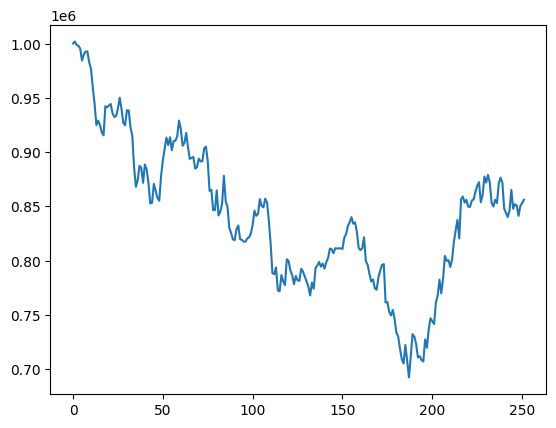

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.143908
Cumulative returns    -0.143908
Annual volatility      0.209304
Sharpe ratio          -0.640839
Calmar ratio          -0.465764
Stability              0.386207
Max drawdown          -0.308971
Omega ratio            0.898842
Sortino ratio         -0.892869
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.068692
Daily value at risk   -0.026902
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (251, 9)
Annual return         -0.094324
Cumulative returns    -0.093968
Annual volatility      0.198502
Sharpe ratio          -0.402058
Calmar ratio          -0.429901
Stability              0.236972
Max drawdown          -0.219408
Omega ratio            0.936015
Sortino ratio         -0.559755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.014390
Daily value at risk   -0.025326
dtype: float64


In [ ]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')

df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.005866e+06
2    2022-01-05  9.951360e+05
3    2022-01-06  9.904718e+05
4    2022-01-07  9.903404e+05
..          ...           ...
247  2022-12-27  9.086102e+05
248  2022-12-28  8.986103e+05
249  2022-12-29  9.080428e+05
250  2022-12-30  9.060324e+05
251  2023-01-03           NaN

[252 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-01-05  9.951360e+05
2022-01-06  9.904718e+05
2022-01-07  9.903404e+05
...                  ...
2022-12-27  9.086102e+05
2022-12-28  8.986103e+05
2022-12-29  9.080428e+05
2022-12-30  9.060324e+05
2023-01-03           NaN

[252 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
348  2023-02-22
349  2023-02-23
350  2023-02-24
351  2023-02-27
352  2023-02-28

[353 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2022-01-03  1.000000e+06
2022-01-04  1.001901e+06
2022-01-05  9.985911e+05
2022-01-06  9.980499e+05
2022-01-07  9.952532e+05
...                  ...
2022-12-27  8.507473e+05
2022-12-28  8.412649e+05
2022-12-29  8.503560e+05
2022-12-30  8.530242e+05
2023-01-03  8.560923e+05

[252 rows x 1 columns]
==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2022-01-03  1.000000e+06  1.000000e+06
2022-01-04  1.001901e+06  1.005866e+06
2022-01-05  9.985911e+05  9.951360e+05
2022-01-06  9.980499e+05  9.904718e+05
2022-01-07  9.952532e+05  9.903404e+05
...       

<Figure size 1500x500 with 0 Axes>

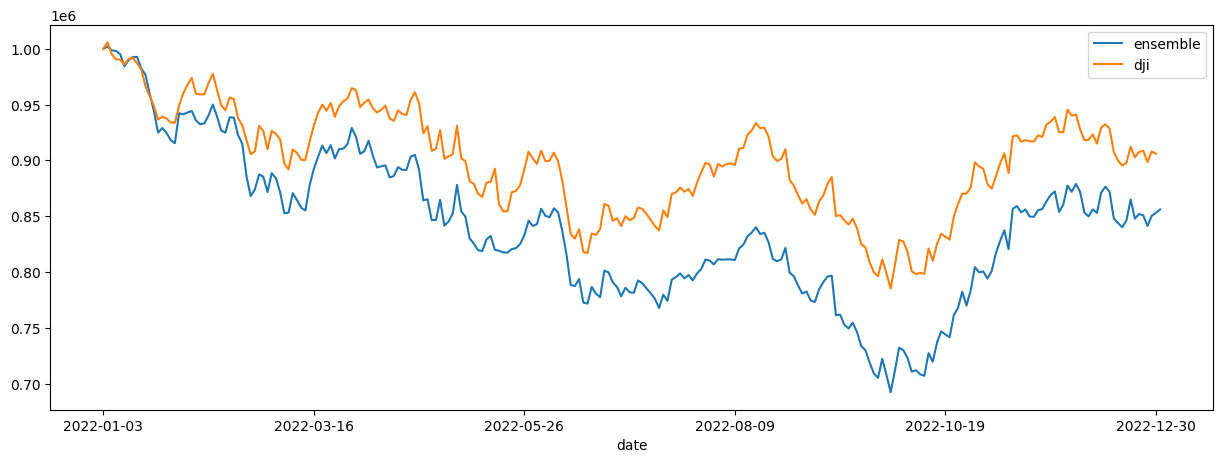

In [ ]:


# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();